# pm2.5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#檔案讀取

GA_data = pd.read_csv('Admission_Predict_Ver1.1.csv')
GA_data.head(n=10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
#個欄位資料觀察

print('Shape of the dataframe:', GA_data.shape)
GA_data.describe(include="all")

Shape of the dataframe: (500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
#刪去有缺失值的資料

GA_data.dropna(axis=0, inplace = True)
print('Shape of the dataframe:', GA_data.shape)

Shape of the dataframe: (500, 9)


In [5]:
#個欄位資料屬性

GA_data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
#標準化成0~1

#from sklearn.preprocessing import MinMaxScaler
#scaler= MinMaxScaler(feature_range=(0, 1))
#GA_data[''] = scaler.fit_transform(np.array(df['']).reshape(-1, 1))
#GA_data[''].head()

In [7]:
GA_data['Chance of Admit '].head()
GA_data= GA_data.rename(columns={'Chance of Admit ': 'Chance'})

In [8]:
#資料欄位調整

labels=GA_data['Chance']
print(labels.head())

GA_data=GA_data.drop(['Chance','Serial No.'],axis = 1)
GA_data.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance, dtype: float64


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [9]:
#資料切割 採90/10方法

indx=450
x_train = GA_data[:indx]
y_train = labels[:indx]
x_test = GA_data[indx:]
y_test =labels[indx:]

print(x_train.shape)
print(x_test.shape)

(450, 7)
(50, 7)


In [10]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [11]:
y_train.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance, dtype: float64

In [12]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
450,320,112,4,3.0,4.5,8.86,1
451,324,113,4,4.5,4.5,9.25,1
452,328,116,4,5.0,3.5,9.60,1
453,319,103,3,2.5,4.0,8.76,1
454,310,105,2,3.0,3.5,8.01,0


In [13]:
y_test.head()

450    0.82
451    0.89
452    0.93
453    0.73
454    0.71
Name: Chance, dtype: float64

In [14]:
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [17]:
#建立模型

from keras import layers
from keras import models

#　MLP模型

model = models.Sequential()
model.add(layers.Dense(512, activation='tanh', input_shape=(7,)))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dropout(0.03))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               4096      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 21,601
Trainable params: 21,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
#訓練

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Instructions for updating:
Use tf.cast instead.
Train on 450 samples, validate on 50 samples
Epoch 1/100
450/450 [==============================] - 1s 2ms/step - loss: 0.0561 - acc: 0.0000e+00 - val_loss: 0.0232 - val_acc: 0.0000e+00
Epoch 2/100
450/450 [==============================] - 0s 78us/step - loss: 0.0218 - acc: 0.0000e+00 - val_loss: 0.0163 - val_acc: 0.0000e+00
Epoch 3/100
450/450 [==============================] - 0s 102us/step - loss: 0.0223 - acc: 0.0000e+00 - val_loss: 0.0170 - val_acc: 0.0000e+00
Epoch 4/100
450/450 [==============================] - 0s 95us/step - loss: 0.0211 - acc: 0.0000e+00 - val_loss: 0.0165 - val_acc: 0.0000e+00
Epoch 5/100
450/450 [==============================] - 0s 91us/step - loss: 0.0221 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0000e+00
Epoch 6/100
450/450 [==============================] - 0s 73us/step - loss: 0.0225 - acc: 0.0000e+00 - val_loss: 0.0173 - val_acc: 0.0000e+00
Epoch 7/100
450/450 [==============================] - 

450/450 [==============================] - 0s 98us/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 57/100
450/450 [==============================] - 0s 86us/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 58/100
450/450 [==============================] - 0s 82us/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 59/100
450/450 [==============================] - 0s 93us/step - loss: 0.0083 - acc: 0.0000e+00 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 60/100
450/450 [==============================] - 0s 84us/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 61/100
450/450 [==============================] - 0s 89us/step - loss: 0.0083 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 62/100
450/450 [==============================] - 0s 84us/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 63/100

In [19]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = model.predict(x_test) 
print_metrics(y_test, y_score, 8)

Mean Square Error      = 0.008341871366648115
Root Mean Square Error = 0.0913338456797266
Mean Absolute Error    = 0.06547323946952818
Median Absolute Error  = 0.04748955726623533
R^2                    = 0.497066798743545
Adjusted R^2           = 0.4132445985341358


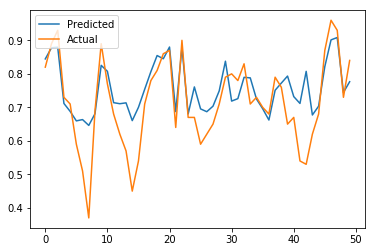

In [20]:
plt.plot(y_score)
plt.plot(y_test)
plt.legend(['Predicted','Actual'], loc=2)

In [ ]:
layer2=[0.093,0.075,0.075,0.062]

p=['SGD','RMSProp','Adagrad','Adam']
plt.scatter(p,layer2)
plt.xlabel('Optimizer')
plt.ylabel('MAE')     

In [ ]:
layer2=[0.118,0.088,0.098,0.083]

p=['SGD','RMSProp','Adagrad','Adam']
plt.scatter(p,layer2)
plt.xlabel('Optimizer')
plt.ylabel('RMSE')     

In [ ]:
layer22=[0.095,0.091,0.082]
p=[128,256,512]
plt.plot(p,layer22)
plt.xlabel('Cell')
plt.ylabel('RMSE')

In [ ]:
layer21=[0.103,0.080,0.108]
layer22=[0.117,0.093,0.127]
layer31=[0.091,0.066,0.080]
layer32=[0.102,0.078,0.092]
layer41=[0.075,0.065,0.075]
layer42=[0.089,0.083,0.093]
layer51=[0.078,0.072,0.068]
layer52=[0.095,0.091,0.082]
p=[128,256,512]
plt.plot(p,layer21)
plt.plot(p,layer31)
plt.plot(p,layer41)
plt.plot(p,layer51)
plt.xlabel('Cell')
plt.ylabel('MAE')
plt.legend(['2layer','3layer','4layer','5layer'], loc=2)

In [ ]:
layer21=[0.103,0.080,0.108]
layer22=[0.117,0.093,0.127]
layer31=[0.091,0.066,0.080]
layer32=[0.102,0.078,0.092]
layer41=[0.075,0.065,0.075]
layer42=[0.089,0.083,0.093]
layer51=[0.078,0.072,0.068]
layer52=[0.095,0.091,0.082]
p=[128,256,512]
plt.plot(p,layer22)
plt.plot(p,layer32)
plt.plot(p,layer42)
plt.plot(p,layer52)
plt.xlabel('Cell')
plt.ylabel('RMSE')
plt.legend(['2layer','3layer','4layer','5layer'], loc=2)